In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
# Load the dataset
file_path = '/kaggle/input/heart-data/train.csv'
heart_data = pd.read_csv(file_path)
heart_data.head()
df = pd.DataFrame(heart_data)
print(df.describe())

                 id           age        gender        height        weight  \
count  56000.000000  56000.000000  56000.000000  56000.000000  56000.000000   
mean   49997.024982  19466.634446      1.349107    164.344089     74.222059   
std    28874.261935   2461.793196      0.476692      8.226979     14.389746   
min        0.000000  10859.000000      1.000000     57.000000     11.000000   
25%    24993.750000  17669.500000      1.000000    159.000000     65.000000   
50%    50001.500000  19698.000000      1.000000    165.000000     72.000000   
75%    74949.500000  21321.000000      2.000000    170.000000     82.000000   
max    99999.000000  23692.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  56000.000000  56000.000000  56000.000000  56000.000000  56000.000000   
mean     129.041732     96.798196      1.366750      1.226679      0.087839   
std      161.551930    193.567517      0.679918    

In [3]:
features = heart_data.drop('cardio', axis = 1)  # independent variables
target = heart_data['cardio']                   # dependent variab

In [4]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform ANOVA to select top k features
k = 4  # Select top 4 features
anova_selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = anova_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = anova_selector.transform(X_test_scaled)

# Get ANOVA F-scores for all features
anova_scores = anova_selector.scores_

# Map feature names to their ANOVA F-scores
feature_names = features.columns
anova_results = dict(zip(feature_names, anova_scores))

# Display ANOVA results
print("ANOVA F-scores for Features:")
for feature, score in anova_results.items():
    print(f"{feature}: {score:.2f}")

# Selected feature indices and names
selected_feature_indices = anova_selector.get_support(indices=True)
selected_features = feature_names[selected_feature_indices]
print("\nSelected Features (Top k):", list(selected_features))

ANOVA F-scores for Features:
id: 1.69
age: 2873.39
gender: 0.13
height: 7.56
weight: 1530.77
ap_hi: 103.24
ap_lo: 213.52
cholesterol: 2297.73
gluc: 380.22
smoke: 21.30
alco: 3.65
active: 65.53

Selected Features (Top k): ['age', 'weight', 'cholesterol', 'gluc']


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = features[['age', 'weight', 'cholesterol', 'gluc']]
y = target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

Linear Regression Evaluation:
Mean Squared Error (MSE): 0.22
Root Mean Squared Error (RMSE): 0.47
R-Squared (R²): 0.11


Confusion Matrix:
[[3659 1980]
 [2070 3491]]


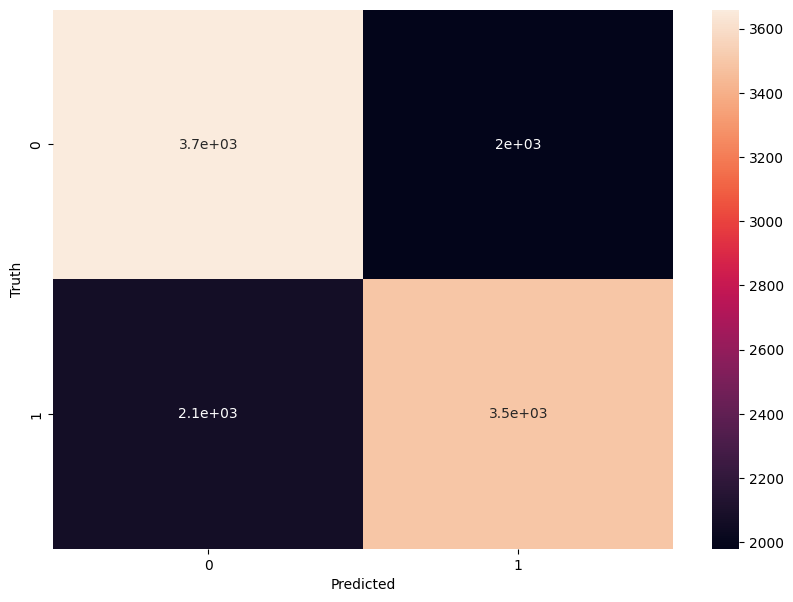

Accuracy: 0.64
Precision: 0.64
Recall: 0.63
F1-Score: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      5639
           1       0.64      0.63      0.63      5561

    accuracy                           0.64     11200
   macro avg       0.64      0.64      0.64     11200
weighted avg       0.64      0.64      0.64     11200



In [8]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm
import seaborn as sns
from matplotlib import pyplot as plt

# Define features and target
X = features[['age', 'weight', 'cholesterol', 'gluc']]
y = target  # 0 = No diabetes, 1 = Diabetes

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=500)  # Increase iterations
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
conf_matrix = sm.confusion_matrix(y_test, y_pred)
accuracy = sm.accuracy_score(y_test, y_pred)
precision = sm.precision_score(y_test, y_pred)
recall = sm.recall_score(y_test, y_pred)
f1 = sm.f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Classification Report:")
print(sm.classification_report(y_test, y_pred))